In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("behavioural_dataset.csv")
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [5]:
data.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [6]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

# Visualizations 

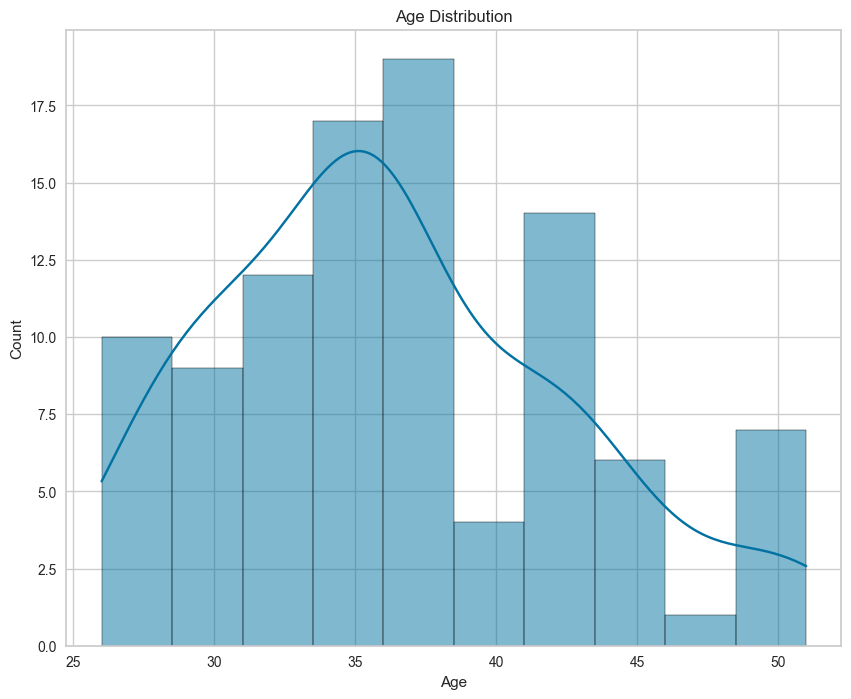

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Age', bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

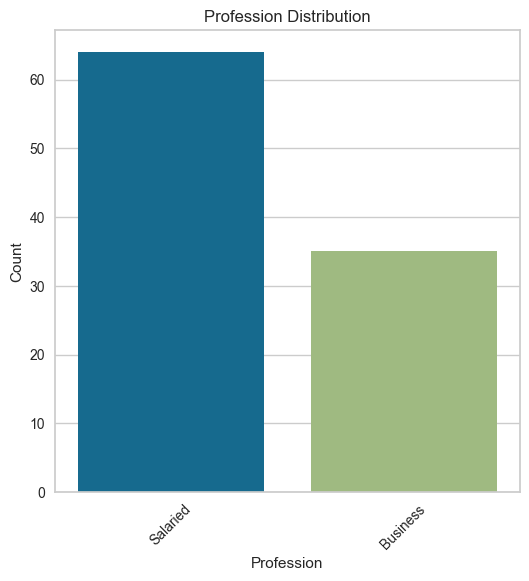

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='Profession')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

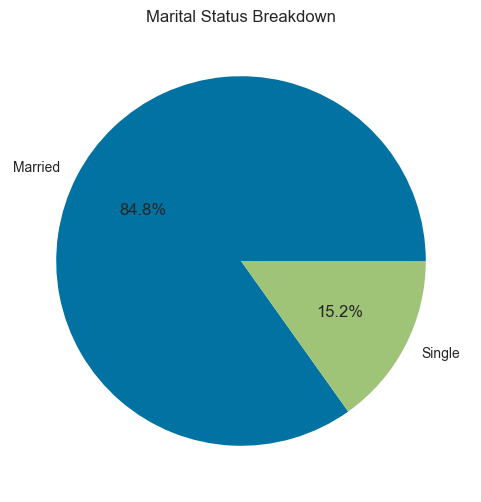

In [11]:
plt.figure(figsize=(6, 6))
data['Marrital Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Breakdown')
plt.ylabel('')
plt.show()

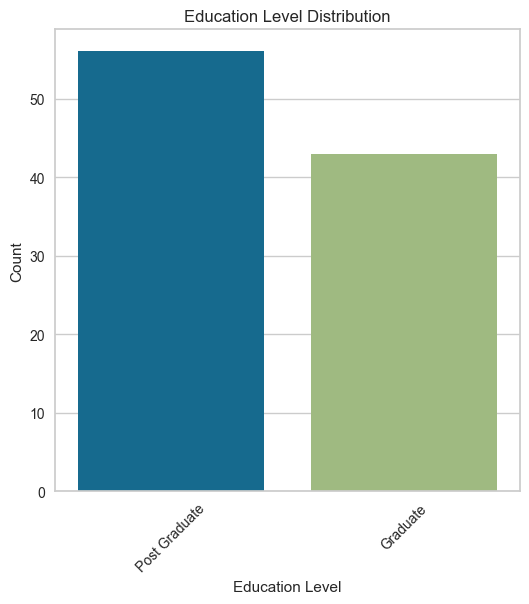

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='Education')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

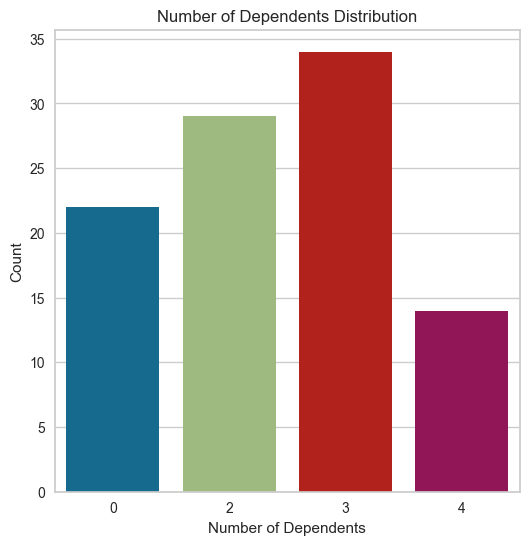

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='No of Dependents')
plt.title('Number of Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

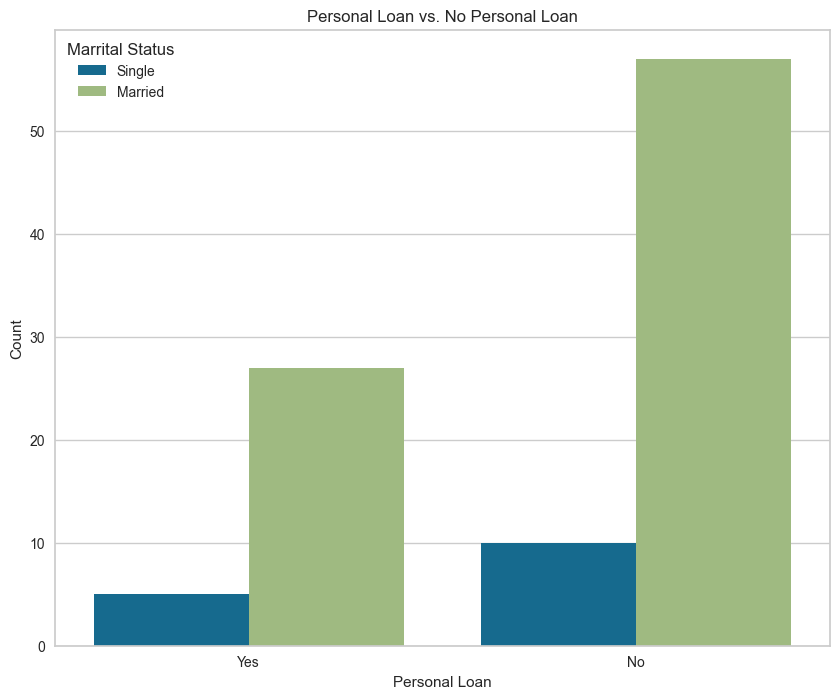

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='Personal loan', hue='Marrital Status')
plt.title('Personal Loan vs. No Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

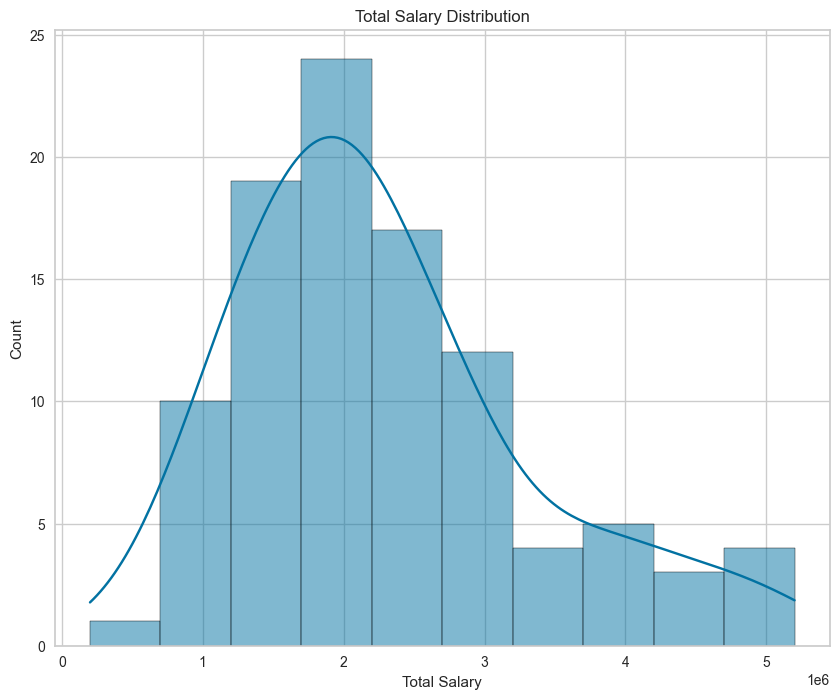

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Total Salary', bins=10, kde=True)
plt.title('Total Salary Distribution')
plt.xlabel('Total Salary')
plt.ylabel('Count')
plt.show()

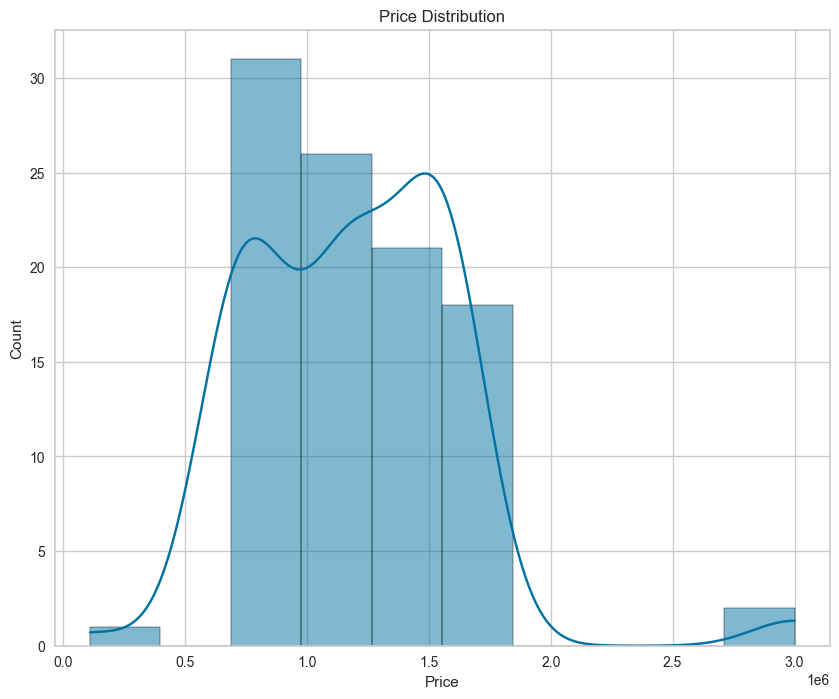

In [35]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Price', bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

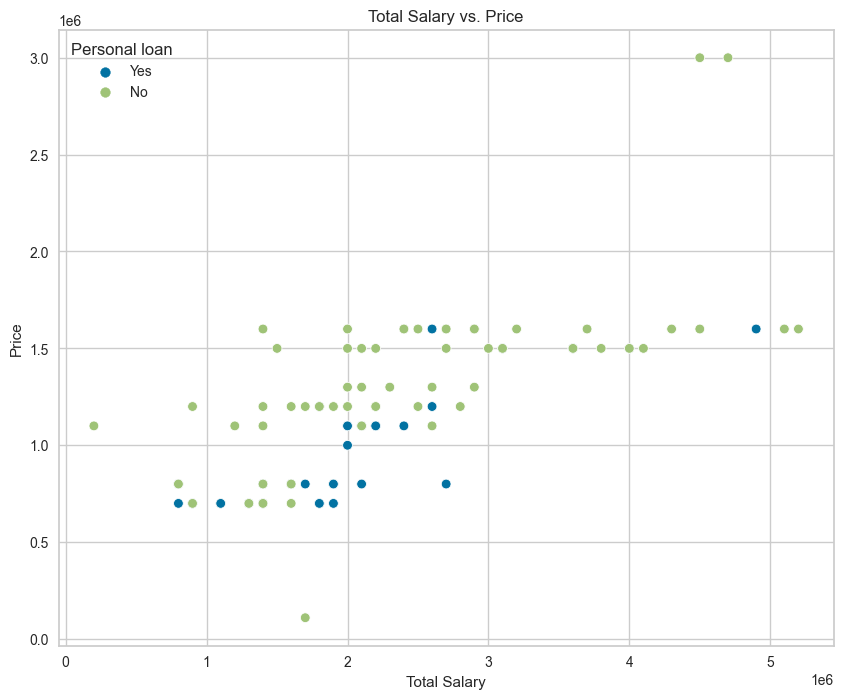

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Total Salary', y='Price', hue='Personal loan')
plt.title('Total Salary vs. Price')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.show()

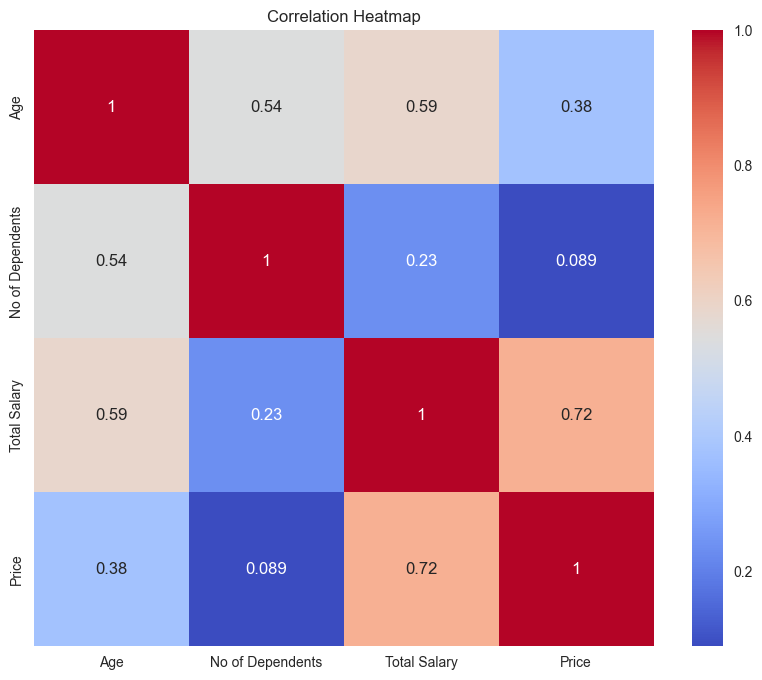

In [21]:
# Heatmap to visualize correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

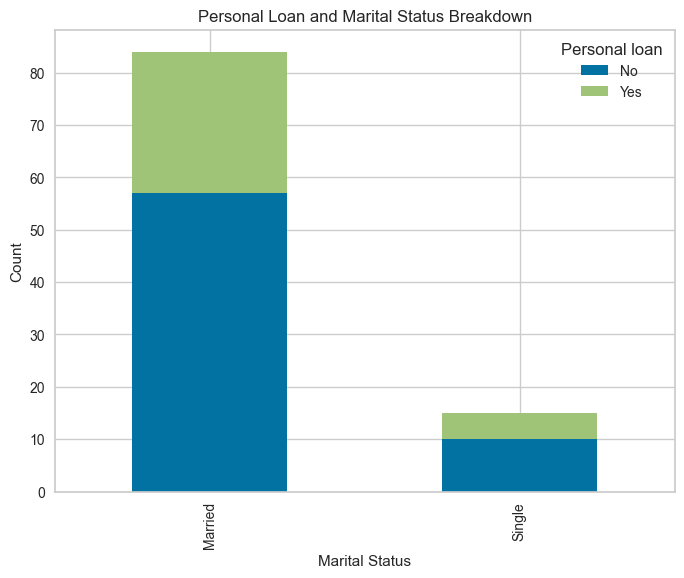

In [23]:
# Personal Loan and Marital Status breakdown
loan_marital = data.groupby(['Marrital Status', 'Personal loan']).size().unstack()
loan_marital.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Personal Loan and Marital Status Breakdown")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

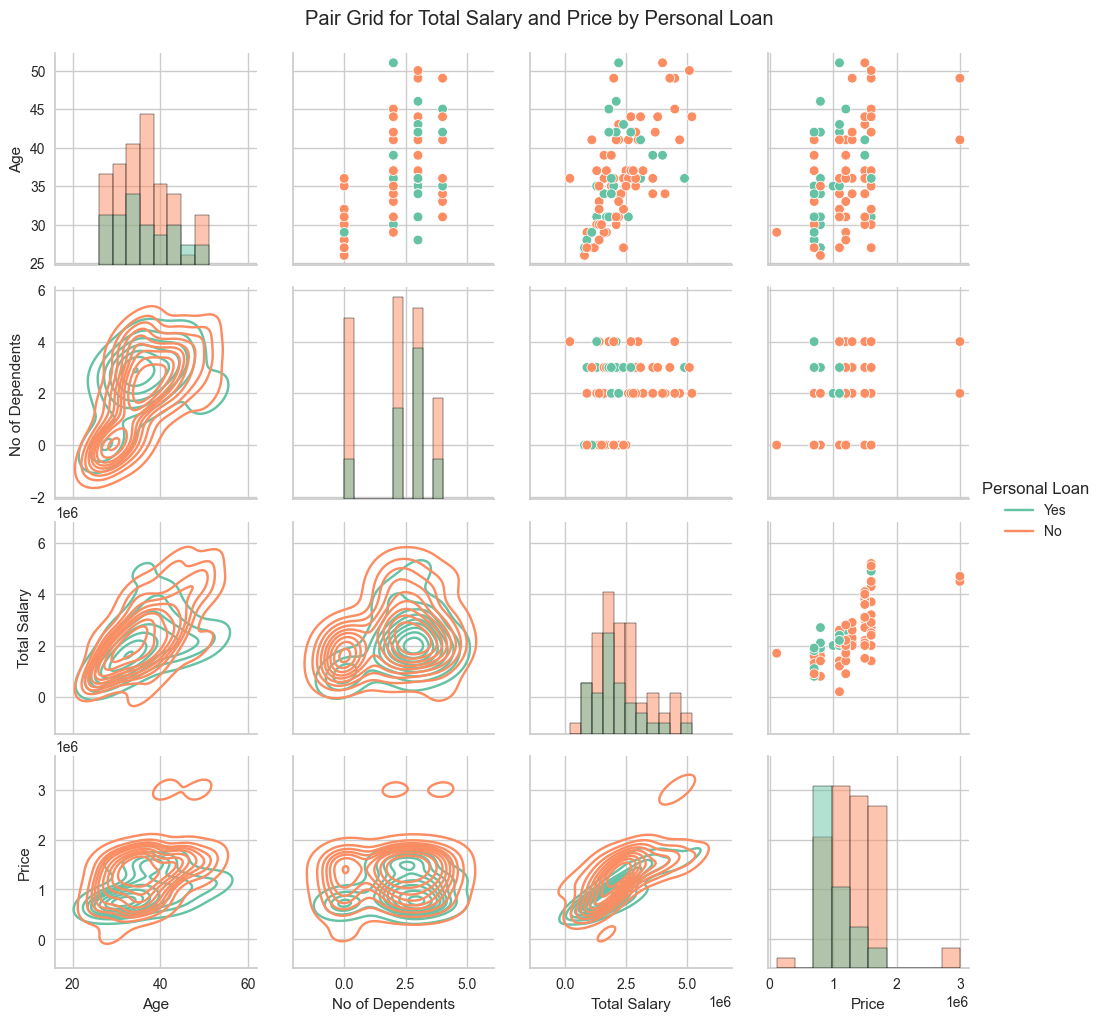

In [25]:
# Total Salary and Price by Personal Loan
g = sns.PairGrid(data, hue='Personal loan', palette="Set2")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot, cmap="Blues")
g.add_legend(title="Personal Loan")
g.fig.suptitle("Pair Grid for Total Salary and Price by Personal Loan", y=1.02)
plt.show()

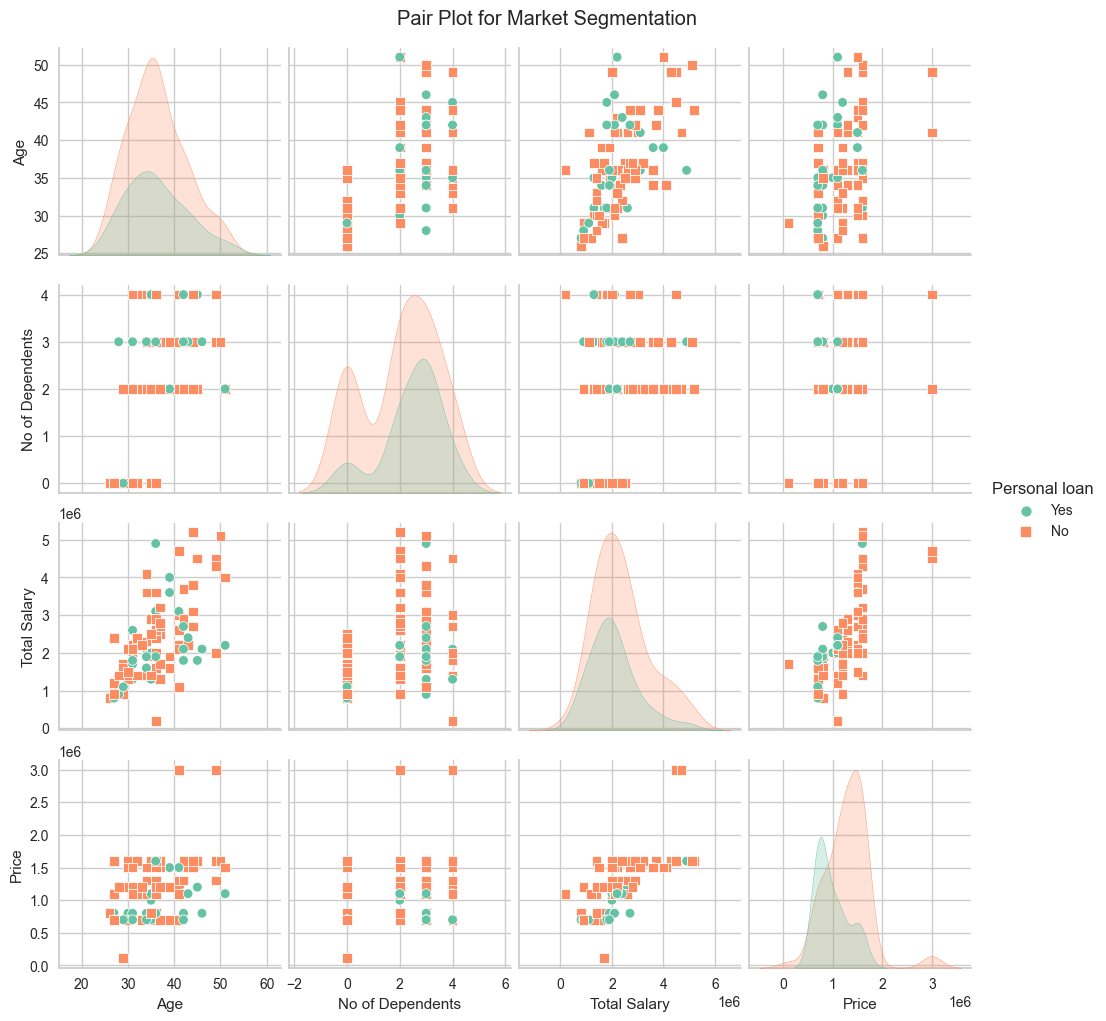

In [27]:
# Pair Plot for a multi-dimensional view of the data
sns.pairplot(data, hue='Personal loan', markers=["o", "s"], palette="Set2")
plt.suptitle("Pair Plot for Market Segmentation", y=1.02)
plt.show()

# Clustering

In [ ]:
# Select features for clustering (age, total salary, and price)
features = data[['Age', 'Total Salary', 'Price']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a K-Means model with a range of cluster numbers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))  # You can adjust the range of cluster numbers

# Fit the visualizer to the data
visualizer.fit(scaled_features)

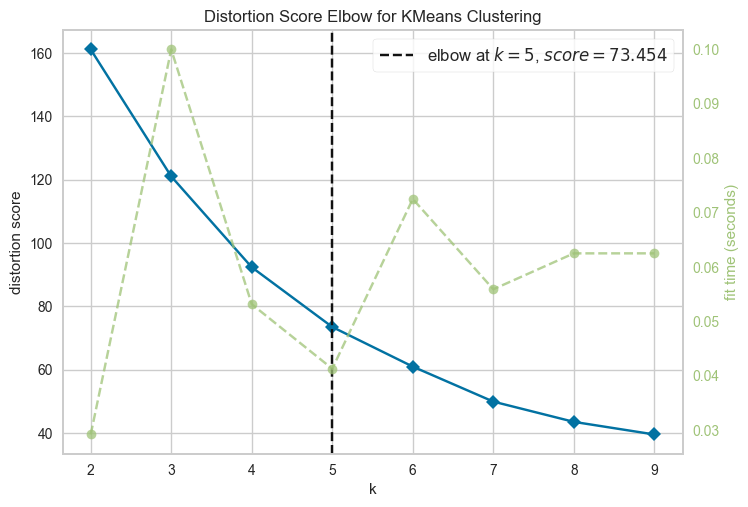

<Figure size 800x600 with 0 Axes>

Optimal number of clusters: 5


In [40]:
# Visualize the "elbow" point to choose the optimal number of clusters
plt.figure(figsize=(8, 6))
visualizer.show()

# Optimal number of clusters based on the "elbow" point
optimal_clusters = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_clusters}")


In [ ]:
# Perform K-Means clustering (you can adjust the number of clusters)
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

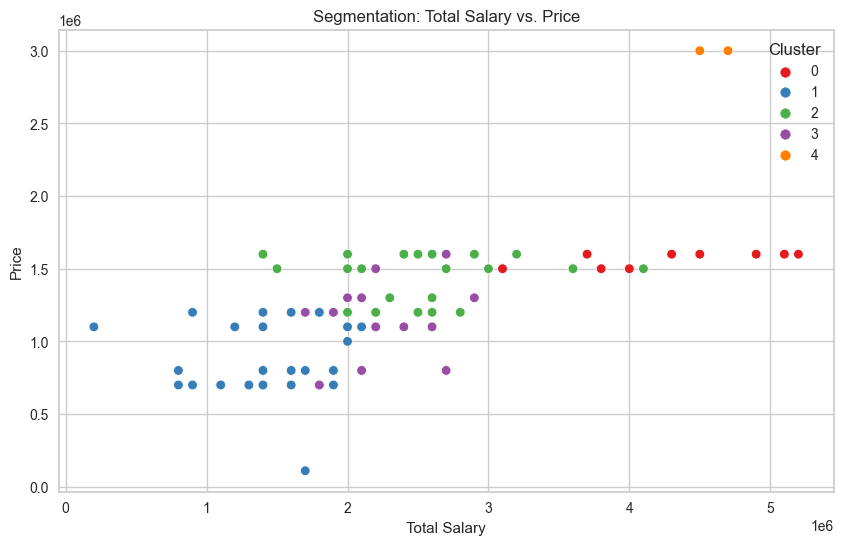

In [45]:
# Set a professional-style background for the plots
sns.set_style("whitegrid")

# Visualize the segmentation

# Scatter plot of Total Salary vs. Price, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Salary', y='Price', hue='Cluster', palette="Set1")
plt.title("Segmentation: Total Salary vs. Price")
plt.xlabel("Total Salary")
plt.ylabel("Price")
plt.show()

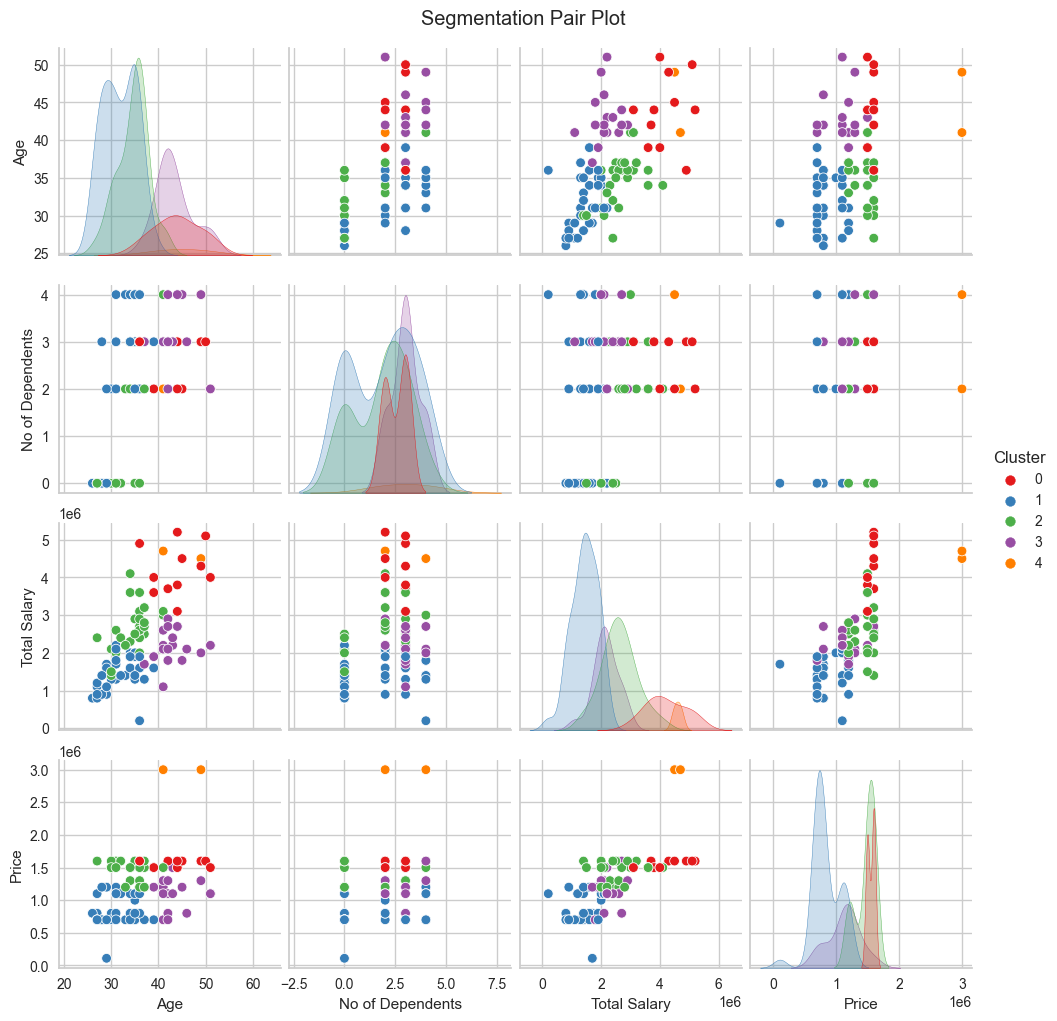

In [44]:
# Pair Plot with segmentation
sns.pairplot(data, hue='Cluster', palette="Set1")
plt.suptitle("Segmentation Pair Plot", y=1.02)
plt.show()

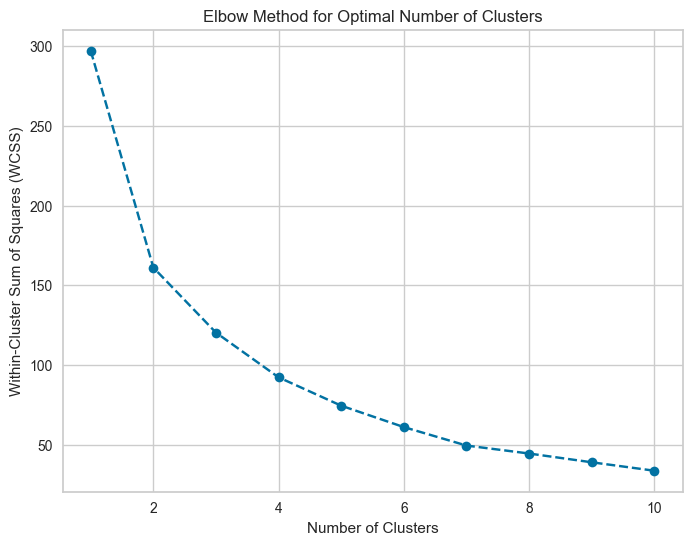

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# Based on the Elbow curve, choose the optimal number of clusters
optimal_clusters = 4  

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

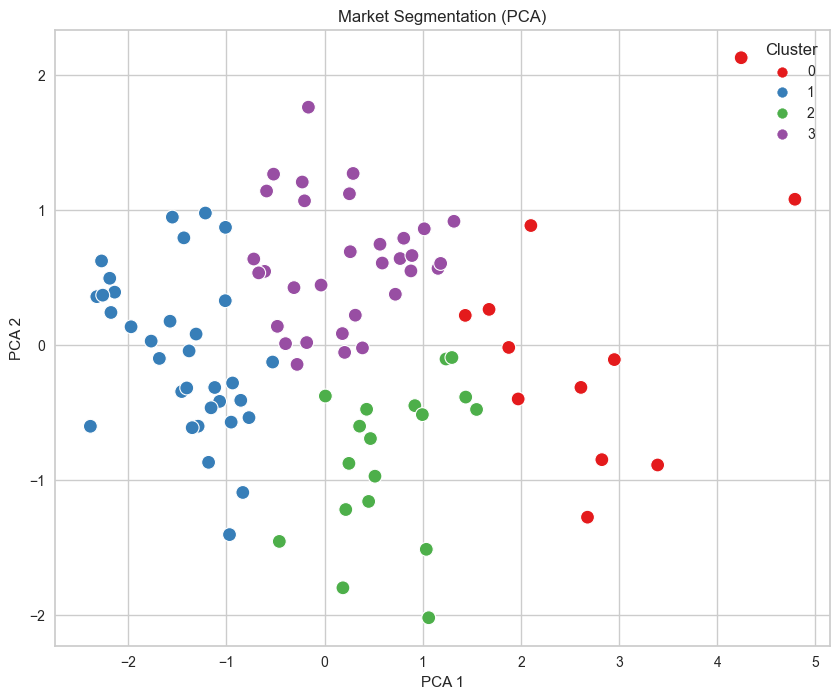

In [55]:
# Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="Set1", s=100)
plt.title("Market Segmentation (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

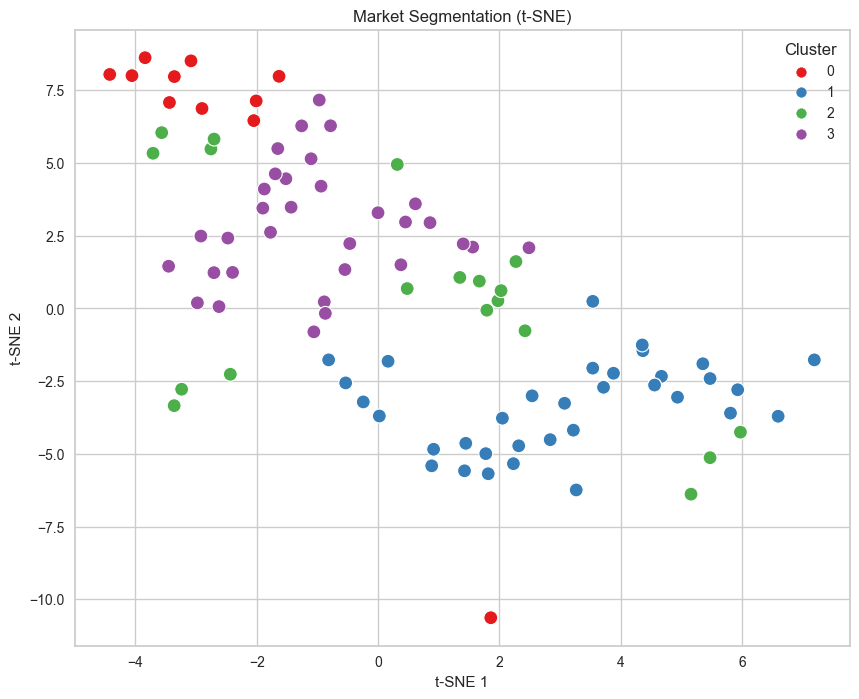

In [56]:
# t-Distributed Stochastic Neighbor Embedding (t-SNE) for further visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)
data['t-SNE1'] = tsne_result[:, 0]
data['t-SNE2'] = tsne_result[:, 1]

# Visualize the clusters using a t-SNE scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="t-SNE1", y="t-SNE2", hue="Cluster", data=data, palette="Set1", s=100)
plt.title("Market Segmentation (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [63]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Determine the optimal number of clusters using the Elbow method
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

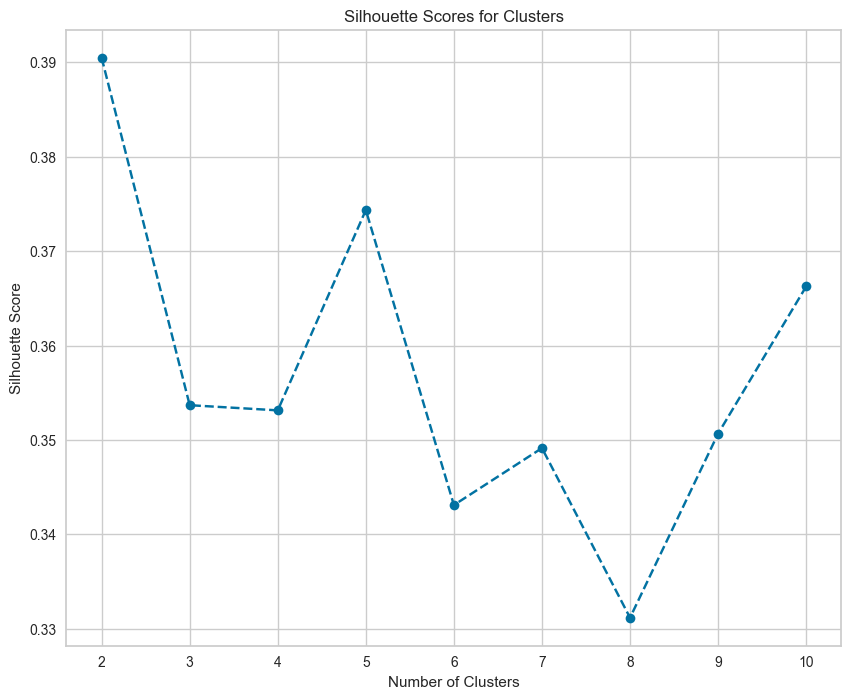

In [66]:
# Plot the Silhouette scores to validate cluster quality
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

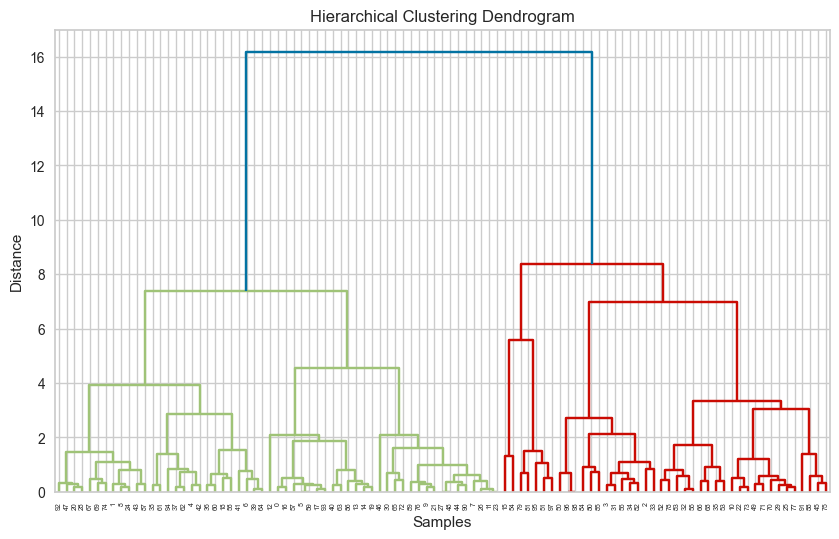

In [65]:
# Hierarchical clustering with dendrograms
linkage_matrix = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [67]:
# Analyze the clusters using cluster-specific statistics
cluster_stats = data.groupby('Cluster').agg({'Age': 'mean', 'Total Salary': 'mean', 'Price': 'mean', 'Cluster': 'count'})
print(cluster_stats)

               Age  Total Salary         Price  Cluster
Cluster                                                
0        44.083333  4.358333e+06  1.800000e+06       12
1        32.000000  1.347222e+06  7.975000e+05       36
2        43.578947  2.373684e+06  1.205263e+06       19
3        33.937500  2.465625e+06  1.406250e+06       32


Text(0.5, 1.0, 'Cluster Distribution (Pie Chart)')

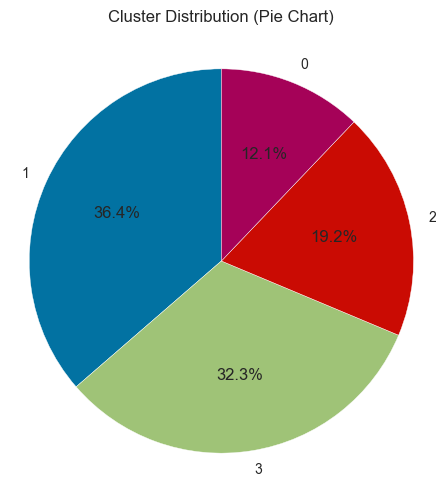

In [69]:
# Count the number of instances in each cluster
cluster_counts = data['Cluster'].value_counts()

# Create a pie chart to visualize the distribution of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Cluster Distribution (Pie Chart)')

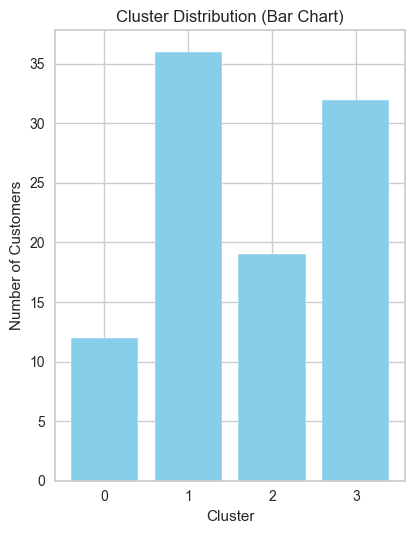

In [70]:
# Create a bar chart to visualize the distribution of clusters
plt.subplot(1, 2, 2)
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution (Bar Chart)')
plt.xticks(cluster_counts.index)

plt.tight_layout()
plt.show()

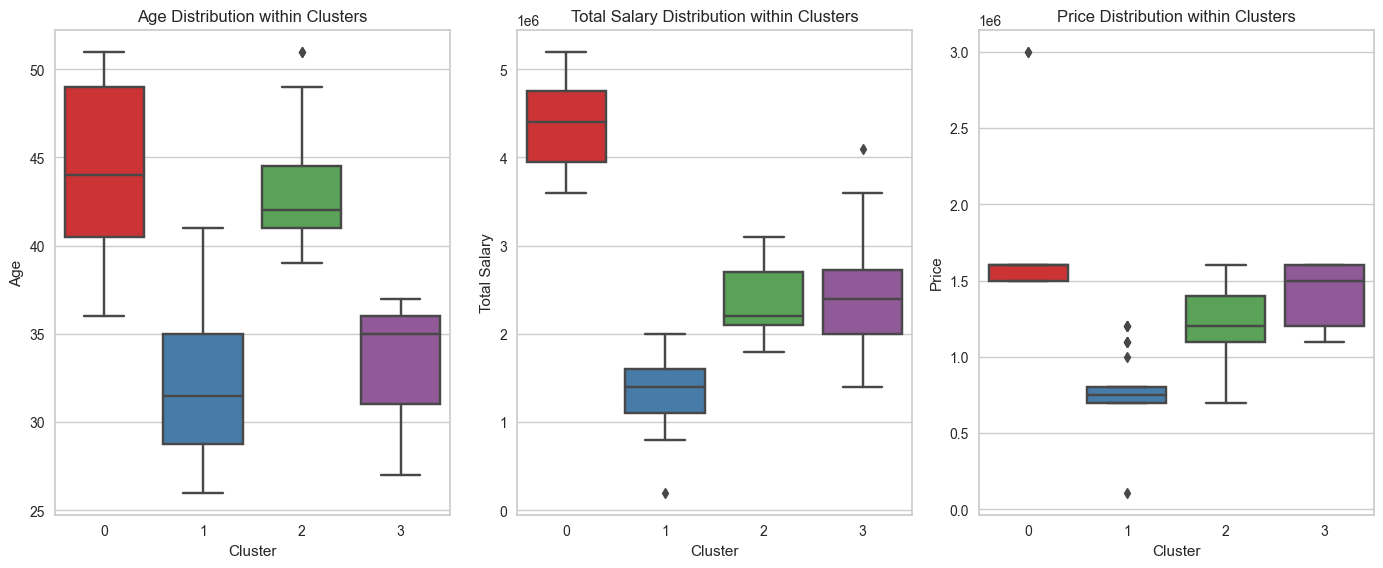

In [75]:
# Create box plots to visualize the distribution of age, total salary, and price within each cluster
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=data, palette="Set1")
plt.title('Age Distribution within Clusters')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Total Salary', data=data, palette="Set1")
plt.title('Total Salary Distribution within Clusters')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Price', data=data, palette="Set1")
plt.title('Price Distribution within Clusters')

plt.tight_layout()
plt.show()

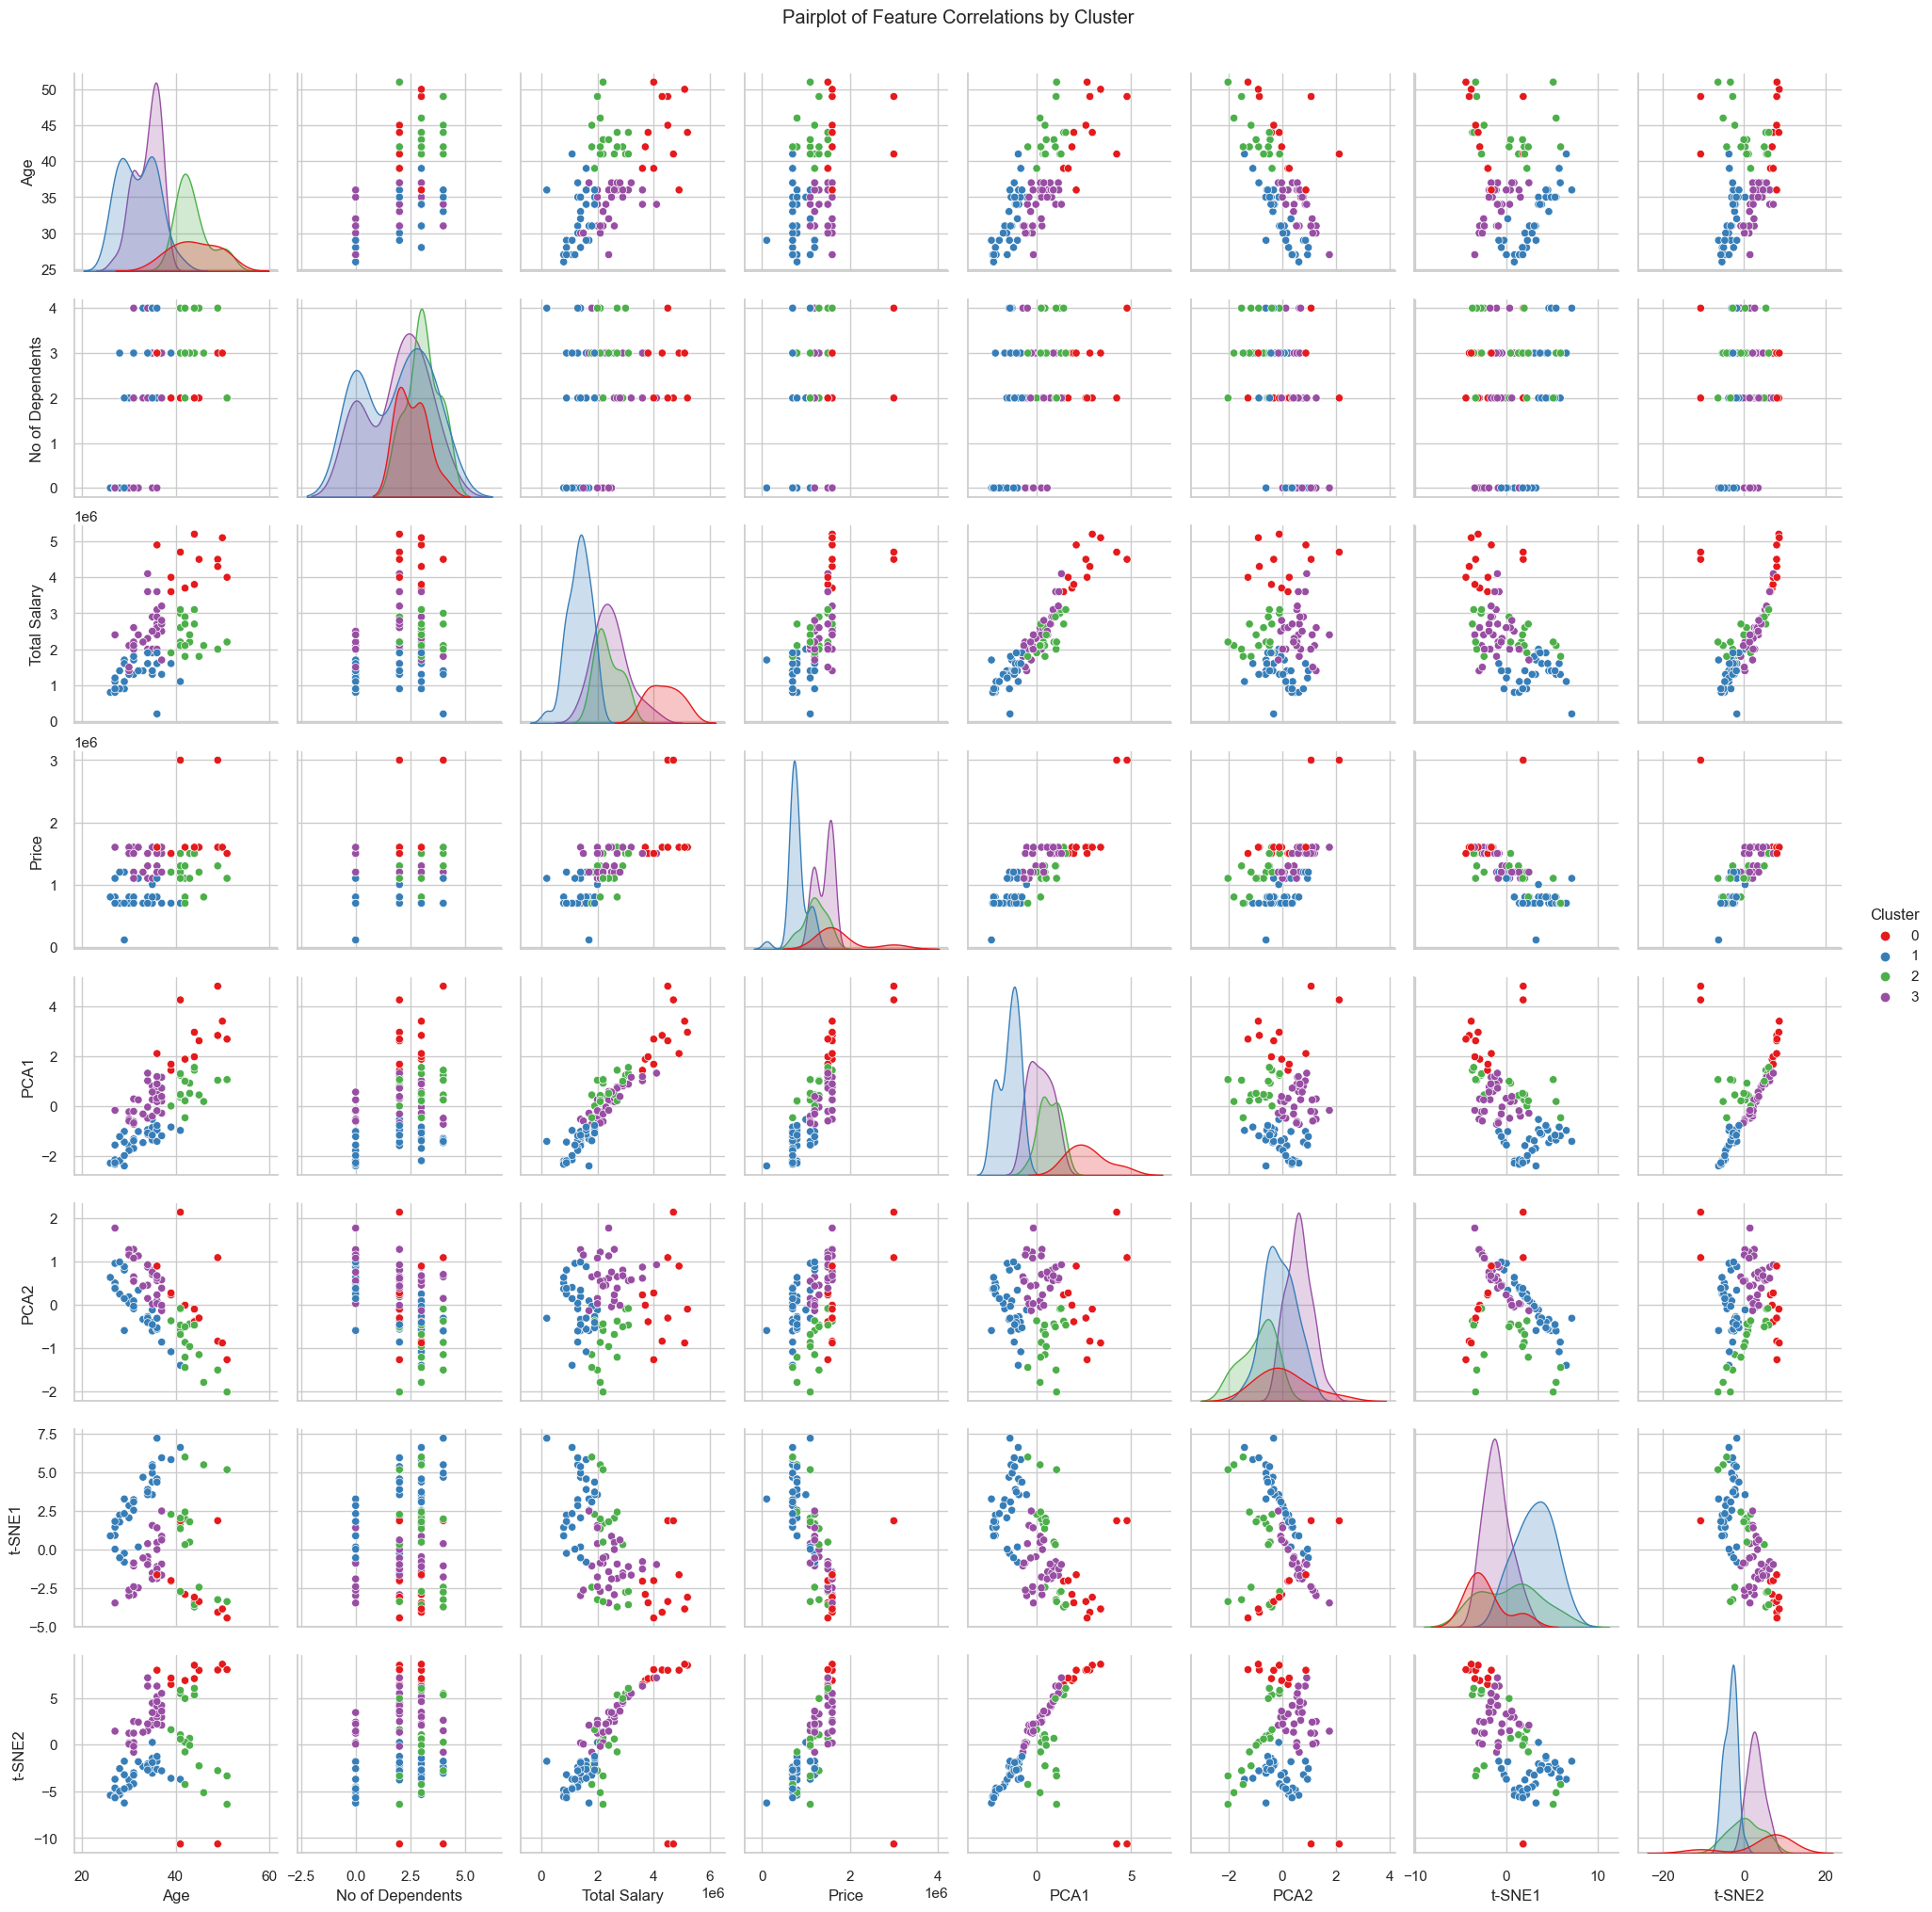

In [77]:
# Create a pairplot to visualize feature correlations within and between clusters
sns.set(style="whitegrid")
g = sns.pairplot(data, hue="Cluster", palette="Set1")
g.fig.suptitle("Pairplot of Feature Correlations by Cluster", y=1.02)
plt.show()